In [66]:
import pandas as pd
import numpy as np
#!pip install scikit-learn
%pip install scipy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import euclidean
from itertools import product
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [67]:
df=pd.read_csv('final_df_preprocessed.csv')

In [68]:
df['label'].value_counts()

label
fleet3    1217200
fleet2     222508
fleet1     122032
fleet4      54640
Name: count, dtype: int64

In [69]:
df1 = df[(df['label'] == 'fleet1')]
df2 = df[(df['label'] == 'fleet2')]
df3 = df[(df['label'] == 'fleet3')]
df4 = df[(df['label'] == 'fleet4')]
df1 = df1.sample(n=1000)
df2 = df2.sample(n=1000)
df3 = df3.sample(n=1000)
df4 = df4.sample(n=1000)


In [70]:
df1

,Unnamed: 0,Time,Engine_Coolant_Temperature_degreesC,Intake_Manifold_Absolute_Pressure_kPa,Engine_RPM_RPM,Vehicle_Speed_Sensor_km_h,Intake_Air_Temperature_degreesC,Air_Flow_Rate_from_Mass_Flow_Sensor_g_s,Absolute_Throttle_Position_,Ambient_Air_Temperature_degreesC,Accelerator_Pedal_Position_D_,Accelerator_Pedal_Position_E_,label,Engine_Coolant_Temperature_A_degreesC,Intake_Air_Temperature_A_degreesC,Ambient_Air_Temperature_A_degreesC
1557783,886617,08:22:44.613,90.0,202.0,2275.0,135.0,6.0,52.36,83.5,1.0,14.1,14.5,fleet1,NaN,NaN,NaN
1606529,2591512,19:36:46.417,NaN,227.0,3235.0,192.0,NaN,111.24,83.5,NaN,76.5,76.1,fleet1,92.0,34.0,29.0
1549005,823522,08:21:51.812,NaN,225.0,3451.0,205.0,NaN,120.13,83.5,NaN,78.4,77.6,fleet1,91.0,21.0,16.0
1547857,822174,08:19:11.340,NaN,227.0,2491.0,145.0,NaN,86.44,83.5,NaN,74.5,74.5,fleet1,91.0,23.0,17.0
1554625,875579,08:07:04.475,90.0,177.0,2427.0,143.0,4.0,58.27,83.5,0.0,49.8,51.0,fleet1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592891,1198835,17:38:55.590,91.0,208.0,1890.0,112.0,20.0,58.86,83.5,11.0,53.3,53.7,fleet1,NaN,NaN,NaN
1538834,739003,18:56:37.904,NaN,205.0,2712.0,161.0,NaN,86.88,83.5,NaN,51.8,52.2,fleet1,91.0,28.0,22.0
1541379,746558,19:07:48.582,NaN,199.0,1878.0,93.0,NaN,56.27,83.5,NaN,52.2,52.5,fleet1,92.0,34.0,25.0
1514374,502724,18:35:55.890,NaN,213.0,2107.0,125.0,NaN,68.66,83.5,NaN,14.1,14.5,fleet1,92.0,30.0,24.0


In [71]:
df2

,Unnamed: 0,Time,Engine_Coolant_Temperature_degreesC,Intake_Manifold_Absolute_Pressure_kPa,Engine_RPM_RPM,Vehicle_Speed_Sensor_km_h,Intake_Air_Temperature_degreesC,Air_Flow_Rate_from_Mass_Flow_Sensor_g_s,Absolute_Throttle_Position_,Ambient_Air_Temperature_degreesC,Accelerator_Pedal_Position_D_,Accelerator_Pedal_Position_E_,label,Engine_Coolant_Temperature_A_degreesC,Intake_Air_Temperature_A_degreesC,Ambient_Air_Temperature_A_degreesC
1287470,157647,08:58:19.652,NaN,102.0,769.0,0.0,NaN,7.19,83.5,NaN,14.1,14.1,fleet2,90.0,46.0,20.0
1308933,185740,08:55:23.504,NaN,106.0,882.0,2.0,NaN,8.13,83.5,NaN,14.1,14.5,fleet2,90.0,19.0,19.0
1432418,325395,08:36:25.975,58.0,108.0,1038.0,0.0,3.0,9.27,83.5,-7.0,14.5,14.5,fleet2,NaN,NaN,NaN
1307156,182933,08:51:20.837,NaN,97.0,1005.0,0.0,NaN,13.52,83.1,NaN,14.1,14.5,fleet2,90.0,64.0,19.0
1450108,344207,08:32:47.232,28.0,123.0,1033.0,16.0,-1.0,19.91,83.5,-3.0,40.8,41.6,fleet2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439616,332708,19:29:55.024,44.0,108.0,960.0,8.0,11.0,19.91,83.5,2.0,27.1,27.5,fleet2,NaN,NaN,NaN
1282352,151308,08:55:57.834,NaN,103.0,768.0,0.0,NaN,7.11,83.5,NaN,14.1,14.5,fleet2,90.0,27.0,24.0
1440337,333429,19:31:25.325,47.0,102.0,1358.0,36.0,12.0,13.61,83.5,2.0,27.5,28.2,fleet2,NaN,NaN,NaN
1373858,260981,20:08:41.470,NaN,121.0,1335.0,37.0,NaN,25.80,83.5,NaN,45.9,46.7,fleet2,91.0,25.0,22.0


In [86]:
columns_to_exclude = ['Absolute_Throttle_Position_', 'Accelerator_Pedal_Position_D_', 'Accelerator_Pedal_Position_E_', 'Unnamed: 0', 'Time', 'label','Air_Flow_Rate_from_Mass_Flow_Sensor_g_s']


filtered_df1 = df1.drop(columns=columns_to_exclude,axis=1).fillna(0)
filtered_df2 = df2.drop(columns=columns_to_exclude,axis=1).fillna(0)
    

filtered_df2 = filtered_df2[filtered_df1.columns]


min_distance = []


for i in filtered_df1.columns:
    distance = np.linalg.norm(np.array(filtered_df1[i]) - np.array(filtered_df2[i]))  
    min_distance.append(distance)


print("Minimum Euclidean Distance between df1 and df2:")
print(np.median(min_distance))



Minimum Euclidean Distance between df1 and df2:
1871.4152398652736


In [85]:
filtered_df3 = df3.drop(columns=columns_to_exclude,axis=1).fillna(0)


min_distance2 = []

for i in filtered_df1.columns:
    distance = np.linalg.norm(np.array(filtered_df1[i]) - np.array(filtered_df3[i]))  # Calculate Euclidean distance
    min_distance2.append(distance)

print("Minimum Euclidean Distance between df1 and df3:")
print(np.median(min_distance2))

Minimum Euclidean Distance between df1 and df3:
1983.246076511939


In [84]:
filtered_df4 = df4.drop(columns=columns_to_exclude,axis=1).fillna(0)

min_distance3 = []

for i in filtered_df1.columns:
    distance = np.linalg.norm(np.array(filtered_df1[i]) - np.array(filtered_df4[i]))  
    min_distance3.append(distance)

print("Minimum Euclidean Distance between df1 and df4:")
print(np.median(min_distance3))

Minimum Euclidean Distance between df1 and df4:
1853.6817418316446


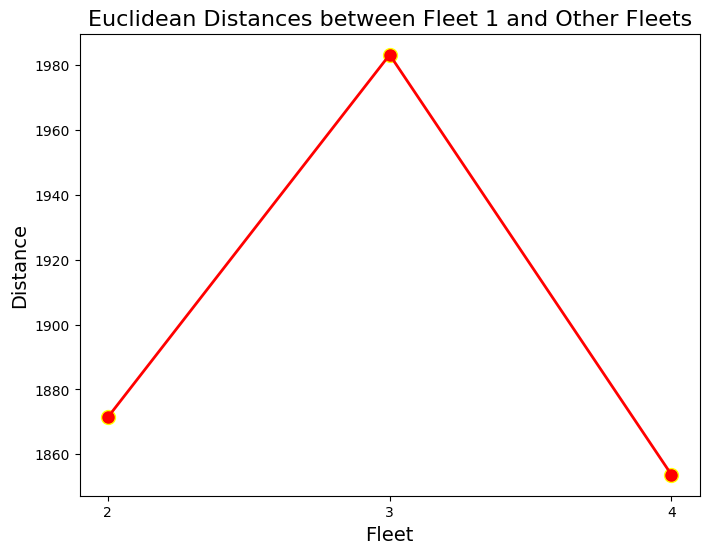

In [87]:
distances = [np.median(min_distance), np.median(min_distance2), np.median(min_distance3)]
fleets = ['2', '3', '4']

plt.figure(figsize=(8, 6))
plt.plot(fleets, distances, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.scatter(fleets, distances, color='yellow', s=100)  # s is the marker size
plt.title('Euclidean Distances between Fleet 1 and Other Fleets', fontsize=16)
plt.xlabel('Fleet', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.show()


In [88]:

min_cos_distance = []


for i in filtered_df1.columns:
    cosine_dist = cosine_distances(np.array(filtered_df1[i]).reshape(1,-1),np.array(filtered_df2[i]).reshape(1,-1))  # Calculate Euclidean distance
    min_cos_distance.append(cosine_dist[0][0])


print("Minimum Cosine Distance between df1 and df2:")
print(np.median(min_cos_distance))

Minimum Cosine Distance between df1 and df2:
0.5314186279359183


In [89]:
min_cos_distance2 = []


for i in filtered_df1.columns:
    cosine_dist2 = cosine_distances(np.array(filtered_df1[i]).reshape(1,-1),np.array(filtered_df3[i]).reshape(1,-1)) 
    min_cos_distance2.append(cosine_dist2[0][0])


print("Minimum Cosine Distance between df1 and df3:")
print(np.median(min_cos_distance2))

Minimum Cosine Distance between df1 and df3:
0.5666386114737725


In [90]:
min_cos_distance3 = []


for i in filtered_df1.columns:
    cosine_dist3 = cosine_distances(np.array(filtered_df1[i]).reshape(1,-1),np.array(filtered_df4[i]).reshape(1,-1)) 
    min_cos_distance3.append(cosine_dist3[0][0])


print("Minimum Cosine Distance between df1 and df4:")
print(np.median(min_cos_distance3))

Minimum Cosine Distance between df1 and df4:
0.4397328594473666


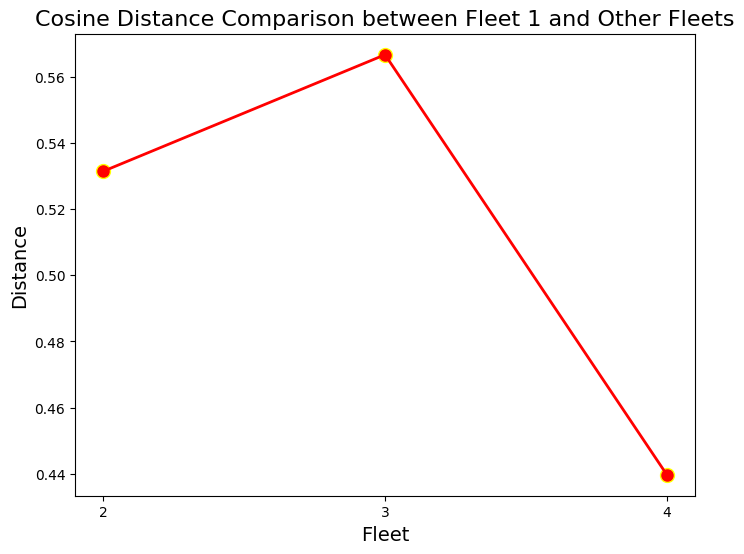

In [94]:
cos_distances = [np.median(min_cos_distance), np.median(min_cos_distance2), np.median(min_cos_distance3)]
fleets = ['2', '3', '4']

plt.figure(figsize=(8, 6))
plt.plot(fleets, cos_distances, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Cosine Distance Comparison between Fleet 1 and Other Fleets', fontsize=16)
plt.xlabel('Fleet', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.scatter(fleets, cos_distances, color='yellow', s=100)
plt.show()


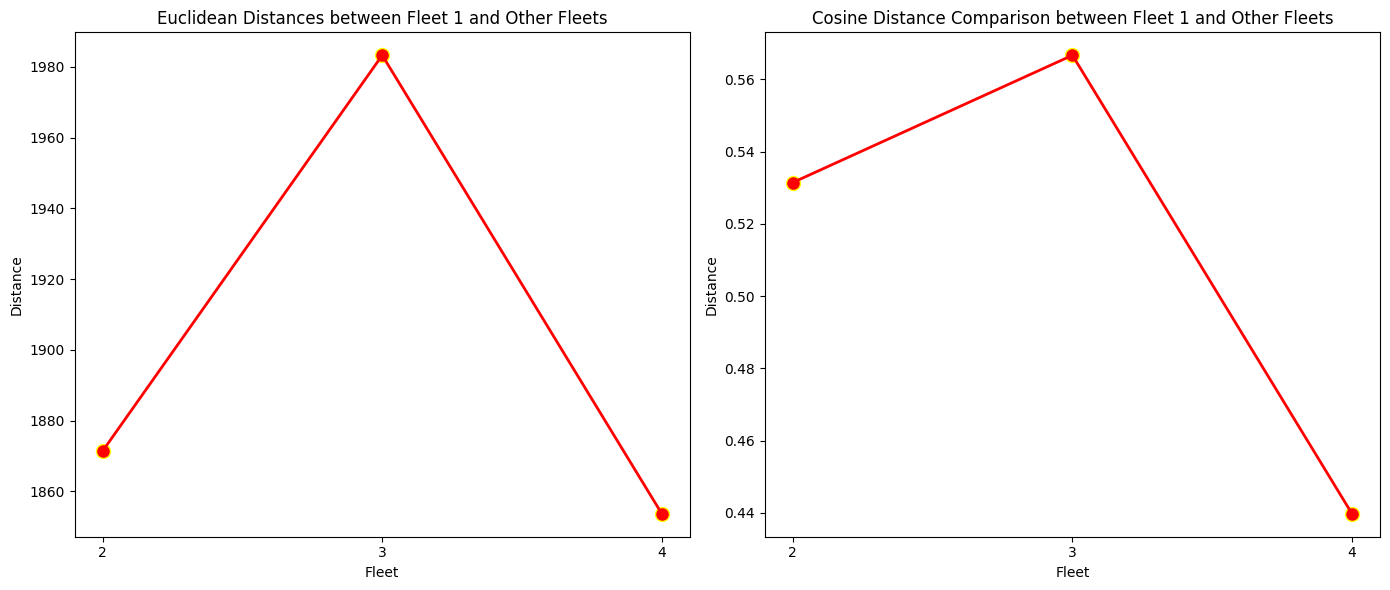

In [92]:
import matplotlib.pyplot as plt

# Euclidean distances
distances_euclidean = [np.median(min_distance), np.median(min_distance2), np.median(min_distance3)]
fleets = ['2', '3', '4']

# Cosine distances
distances_cosine = [np.median(min_cos_distance), np.median(min_cos_distance2), np.median(min_cos_distance3)]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot Euclidean distances
axs[0].plot(fleets, distances_euclidean, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
axs[0].scatter(fleets, distances_euclidean, color='yellow', s=100)
axs[0].set_title('Euclidean Distances between Fleet 1 and Other Fleets')
axs[0].set_xlabel('Fleet')
axs[0].set_ylabel('Distance')

# Plot Cosine distances
axs[1].plot(fleets, distances_cosine, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
axs[1].scatter(fleets, distances_cosine, color='yellow', s=100)
axs[1].set_title('Cosine Distance Comparison between Fleet 1 and Other Fleets')
axs[1].set_xlabel('Fleet')
axs[1].set_ylabel('Distance')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
